### Import neccessary packages

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set_theme(style="white", palette=None)
pd.set_option("display.max_columns", None) #Show all columns, or else some will just be "..."

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

### Read Files

In [3]:
train_df = pd.read_csv("./datasets/train.csv")
train_df_oversampled = pd.read_csv("./datasets/train_oversampled.csv")
train_df_smoten = pd.read_csv("./datasets/train_smoten.csv")
test_df = pd.read_csv("./datasets/test.csv")

Before we continue, we split the test data into X_test and y_test

In [13]:
X_test = pd.DataFrame(test_df.loc[:, test_df.columns!= "RATING_GROUP"])
y_test = pd.DataFrame(test_df.loc[:, "RATING_GROUP"])

### Machine learning

**Function for model evaluation**

In [20]:
def evaluate_model(y_train,y_train_pred, y_test, y_test_pred):
    # Print the Classification Report
    print("Train Data")
    print(classification_report(y_train,y_train_pred))
    print()

    print("Train Data")
    print(classification_report(y_test,y_test_pred))

    # Plot the three-way Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

**Creating a Model for RATING_GROUP: Attempt 1 (Decision Tree Using Imbalanced data)**

Since our data are mostly categorical variables, we chose Decision Tree as our model.

Our predictors for `RATING_GROUP`: `CONTENT_RATING`, `CATEGORY`, `INSTALLS_GROUP`, `SIZEBAND`, `PRICEBAND`, `FREE`, `AD_SUPPORTED`, `IN_APP_PURCHASES`, `EDITORS_CHOICE`

In [22]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "RATING_GROUP"])
y_train = pd.DataFrame(train_df.loc[:, "RATING_GROUP"])

#Fit the model
decision_tree = DecisionTreeClassifier() #set max-depth to default
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Check the accuracy of the model

Train Data
              precision    recall  f1-score   support

           0       0.66      0.05      0.09       394
           1       0.73      0.98      0.84      5085
           2       0.62      0.09      0.16      1628

    accuracy                           0.73      7107
   macro avg       0.67      0.37      0.36      7107
weighted avg       0.70      0.73      0.64      7107


Train Data
              precision    recall  f1-score   support

           0       0.14      0.01      0.01       129
           1       0.71      0.97      0.82      1672
           2       0.38      0.06      0.10       568

    accuracy                           0.70      2369
   macro avg       0.41      0.34      0.31      2369
weighted avg       0.60      0.70      0.60      2369



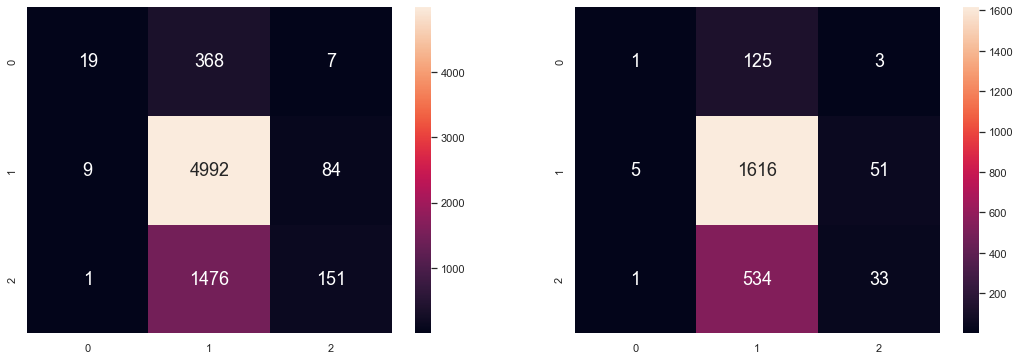

In [23]:
# Predict test data using the model created
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 2 (Decision Tree Using Oversampled (Randomly Sampled) data)**


In [24]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "RATING_GROUP"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "RATING_GROUP"])

#Fit the model
decision_tree = DecisionTreeClassifier() #set max-depth to default
decision_tree.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.48      0.51      0.49      2500
           1       0.59      0.80      0.68      5085
           2       0.62      0.13      0.21      2500

    accuracy                           0.56     10085
   macro avg       0.56      0.48      0.46     10085
weighted avg       0.57      0.56      0.52     10085


Train Data
              precision    recall  f1-score   support

           0       0.10      0.37      0.16       129
           1       0.73      0.79      0.76      1672
           2       0.37      0.07      0.11       568

    accuracy                           0.60      2369
   macro avg       0.40      0.41      0.35      2369
weighted avg       0.61      0.60      0.57      2369



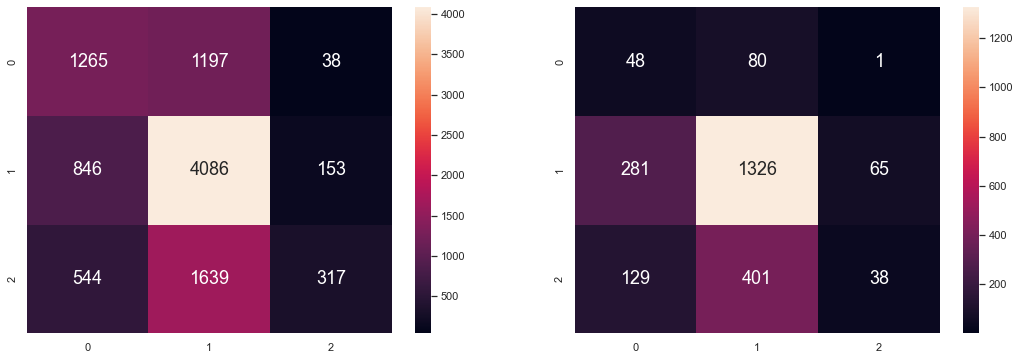

In [26]:
# Predict test data using the model created
y_train_oversampled_pred = decision_tree.predict(X_train_oversampled)
y_test_pred = decision_tree.predict(X_test)

evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 3 (Decision Tree Using Oversampled (SMOTEN) data)**

In [27]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "RATING_GROUP"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "RATING_GROUP"])

#Fit the model
decision_tree = DecisionTreeClassifier() #set max-depth to default
decision_tree.fit(X_train_smoten, y_train_smoten)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.49      0.46      0.47      2500
           1       0.58      0.82      0.68      5085
           2       0.60      0.14      0.23      2500

    accuracy                           0.56     10085
   macro avg       0.56      0.47      0.46     10085
weighted avg       0.56      0.56      0.52     10085


Train Data
              precision    recall  f1-score   support

           0       0.10      0.30      0.15       129
           1       0.74      0.82      0.78      1672
           2       0.40      0.09      0.14       568

    accuracy                           0.62      2369
   macro avg       0.41      0.40      0.36      2369
weighted avg       0.62      0.62      0.59      2369



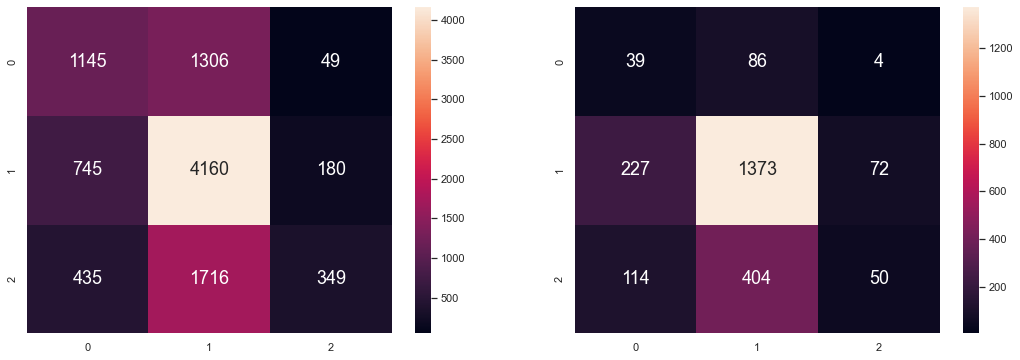

In [28]:
# Predict test data using the model created
y_train_smoten_pred = decision_tree.predict(X_train_smoten)
y_test_pred = decision_tree.predict(X_test)

evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)

In [20]:
rfc= RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1, 100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100, 500, 1000]})

max_depth = np.arange(10,20)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth=12), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

In [21]:
from sklearn.ensemble import RandomForestClassifier

#fit
model_rf = RandomForestClassifier(criterion='entropy')
model_rf.fit(X_train, y_train)

#predict y
y_pred_test_rf = model_rf.predict(X_test)

#score
print(confusion_matrix(y_test, y_pred_test_rf))

[[   0  124    4]
 [   2 1650   65]
 [   1  477   46]]


In [22]:
# Fetch the best Model or the best set of Hyper-parameters
print(CV_rfc.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(CV_rfc.best_score_))

RandomForestClassifier(max_depth=4, random_state=42)
0.7091600673442664


Train Data
              precision    recall  f1-score   support

           0       0.60      0.04      0.07       395
           1       0.73      0.98      0.83      5040
           2       0.61      0.10      0.18      1672

    accuracy                           0.72      7107
   macro avg       0.65      0.37      0.36      7107
weighted avg       0.69      0.72      0.64      7107


Train Data
              precision    recall  f1-score   support

           0       0.07      0.01      0.01       128
           1       0.73      0.96      0.83      1717
           2       0.41      0.08      0.13       524

    accuracy                           0.72      2369
   macro avg       0.41      0.35      0.33      2369
weighted avg       0.63      0.72      0.63      2369



<AxesSubplot:>

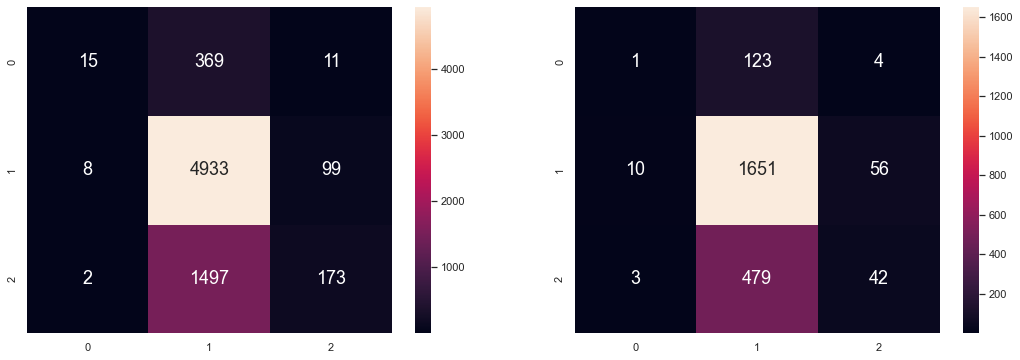

In [23]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

In [24]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

72.06

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.01      0.01       128
           1       0.73      0.96      0.83      1717
           2       0.41      0.08      0.13       524

    accuracy                           0.72      2369
   macro avg       0.41      0.35      0.33      2369
weighted avg       0.63      0.72      0.63      2369

[[   1  123    4]
 [  10 1651   56]
 [   3  479   42]]


### Predict `INSTALLS_GROUP`

In [26]:
# Extract Response and Predictors
response = "INSTALLS_GROUP"
y = pd.DataFrame(model_df_encoded[response])
X = pd.DataFrame(model_df_encoded.drop(response, axis = 1))
X.drop(["RATING_GROUP"], inplace = True, axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=99)

#Fit the model
decision_tree = DecisionTreeClassifier() #set max-depth to default
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.77      0.49      0.59       723
           1       0.83      0.98      0.90      5616
           2       0.74      0.04      0.08       768

    accuracy                           0.83      7107
   macro avg       0.78      0.50      0.52      7107
weighted avg       0.82      0.83      0.78      7107


Train Data
              precision    recall  f1-score   support

           0       0.72      0.47      0.57       248
           1       0.82      0.97      0.89      1852
           2       0.57      0.04      0.08       269

    accuracy                           0.81      2369
   macro avg       0.70      0.49      0.51      2369
weighted avg       0.78      0.81      0.76      2369



<AxesSubplot:>

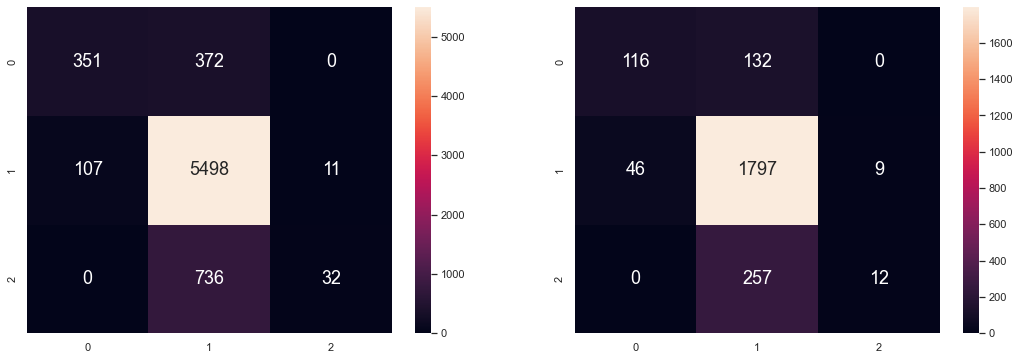

In [27]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

In [28]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
rfc= RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1, 100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100, 500, 1000]})

In [30]:
# Fetch the best Model or the best set of Hyper-parameters
print(CV_rfc.best_params_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(CV_rfc.best_score_))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
0.8228501352527043


Train Data
              precision    recall  f1-score   support

           0       0.76      0.49      0.59       723
           1       0.83      0.98      0.90      5616
           2       0.73      0.04      0.08       768

    accuracy                           0.83      7107
   macro avg       0.78      0.50      0.53      7107
weighted avg       0.81      0.83      0.78      7107


Train Data
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       248
           1       0.82      0.97      0.89      1852
           2       0.57      0.04      0.08       269

    accuracy                           0.81      2369
   macro avg       0.71      0.50      0.52      2369
weighted avg       0.78      0.81      0.77      2369



<AxesSubplot:>

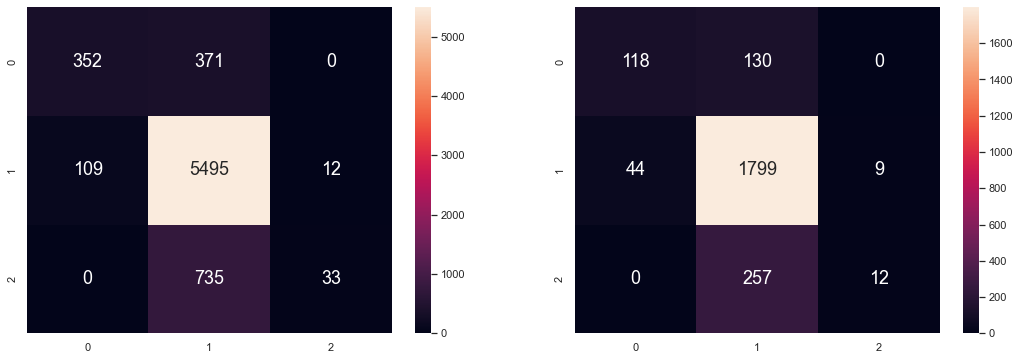

In [31]:
#Fit the model
rfc_best = RandomForestClassifier(criterion="gini", max_depth=8, max_features="auto", n_estimators=100) 
rfc_best.fit(X_train, y_train)

y_train_pred = rfc_best.predict(X_train)
y_test_pred = rfc_best.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])